<a href="https://colab.research.google.com/github/oburckard/MyRepo/blob/master/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(xi, f(xi)) = (4,2), (6,8), (5,4), (1,10)

Lagrange base :

l0(x) = (x-6)(x-5)(x-1)/6

l1(x) = (x-4)(x-5)(x-1)/10

l2(x) = (x-4)(x-6)(x-1)/(-4)

l3(x) = (x-4)(x-6)(x-5)/(-60)

p(x) = f(x0)l0(x)+f(x1)l1(x)+f(x2)l2(x)+f(x3)l3(x)

p(x) = 2*(x-6)(x-5)(x-1)/6 + 8*(x-4)(x-5)(x-1)/10 + 4*(x-4)(x-6)(x-1)/(-4) + 10*(x-4)(x-6)(x-5)/(-60)

p(x) = (-1/30)*x^3 + (3/2)*x^2 -(142/15)*x + 18


Newton base :

x0=4 f[x0]=2

               f[x0,x1]=3           f[x0,x1,x2]=1          f[x0,x1,x2,x3]=-1/30 

x1=6 f[x1]=8                    

               f[x1,x2]=4           f[x1,x2,x3]=11/10

x2=5 f[x2]=4

               f[x2,x3]=-3/2

x3=1 f[x3]=10


p(x) = 2 + 3(x-4) + (x-4)(x-6) - (1/30)(x-4)(x-6)(x-5)

p(x) = (-1/30)*x^3 + (3/2)*x^2 -(142/15)*x + 18

We find the same  polynomial.


In [32]:
## POLYNOMIAL INTERPOLATION ##


# Lagrange Polynomials in Python
import numpy as np

def  lagrange(x,i,xm):
  """
  Evaluates  the i-th  Lagrange  polynomial  at point x 
  based on grid  data xm
  """
  n=len(xm)-1
  y=1.
  for j in  range(n+1):
    if i!=j:
      y*=(x-xm[j])/(xm[i]-xm[j])
  return y


def  interpolation(x,xm ,ym):
  n=len(xm)-1
  lagrpoly=np.array([lagrange(x,i,xm) for i in range(n+1)])
  y = np.dot(ym ,lagrpoly)
  return y

#xm = np.array([1,2,3,4,5,6])
#ym = np.array([-3,0,-1,2,1,4])
#xplot = np.linspace(0.9,6.1,100)
#interpolation of sin(x)
#xm = np.array([0,2,4,6,8,10])
#ym = np.array([0,0.909,-0.75,-0.279,0.989,-0.544])
n = input('Number of nods (between 3 and 20): ')
n = int(n)
m = 10/(n-1)
xm = np.zeros((n), dtype='f')
ym = np.zeros((n), dtype='f')
for i in range(n):
  xm[i] = float(-m + (i+1)*m)
  ym[i] = np.sin(xm[i])
xplot = np.linspace(0,10,100)

yplot = interpolation(xplot, xm, ym)

print('X dataponts: ',xm)
print('Y dataponts: ',ym)



Number of nods (between 3 and 20): 20
X dataponts:  [ 0.         0.5263158  1.0526316  1.5789474  2.1052632  2.631579
  3.1578948  3.6842105  4.2105265  4.736842   5.263158   5.7894735
  6.3157897  6.8421054  7.368421   7.894737   8.421053   8.947369
  9.473684  10.       ]
Y dataponts:  [ 0.          0.50235116  0.86872965  0.9999668   0.8605403   0.48818922
 -0.01630147 -0.5163796  -0.8766881  -0.999701   -0.85212237 -0.47389767
  0.03259861  0.53027093  0.8844135   0.99916965  0.8434778   0.45947972
 -0.04888686 -0.5440211 ]


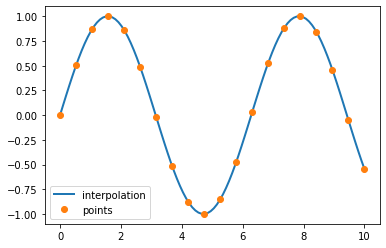

In [33]:
## PLOT THE RESULTS ##


def polyplot(xm, ym, xplot, yplot):
  # Import pyplot as plt
  import matplotlib.pyplot as plt

  #plot the function

  plt.plot(xplot, yplot, lw=2, label='interpolation')

  plt.plot(xm, ym, 'o', label='points')

  plt.legend()
  plt.show()

polyplot(xm, ym, xplot, yplot)

In [29]:
## NEWTON BASE ##


def poly_newton_coefficient(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y).astype(float)

    for k in range(1, m):
        for i in range(m-1, k-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-k])
            
    return a

def newton_interpolation(x, x_data, y_data):
    """
    x: evaluation point(s)
    x_data: data points at x
    y_data: data points at y
     """
    a = poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]
    print("array a = ",a)

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p



#xm = np.array([-1,0,1,2])
#ym = np.array([5,1,1,11])
#xplot = np.linspace(-1.1,2.1,100)
#xplot = np.array([-1,0,1,2])

#xm = np.array([1,2,3,4,5,6])
#ym = np.array([-3,0,-1,2,1,4])
#xplot = np.linspace(0.9,6.1,100)
#interpolation of sin(x)
#xm = np.array([0,2,4,6,8,10])
#ym = np.array([0,0.909,-0.75,-0.279,0.989,-0.544])
n = input('Number of nods (between 3 and 20): ')
n = int(n)
m = 10/(n-1)
xm = np.zeros((n), dtype='f')
ym = np.zeros((n), dtype='f')
zeros = np.zeros((n), dtype='f')
for i in range(n):
  xm[i] = float(-m + (i+1)*m)
  ym[i] = np.sin(xm[i])

xplot = np.linspace(0,10,100)
yplot = newton_interpolation(xplot, xm, ym)



Number of nods (between 3 and 20): 6
array a =  [ 0.          0.4546487  -0.32192466  0.09831009 -0.01580986  0.00099728]


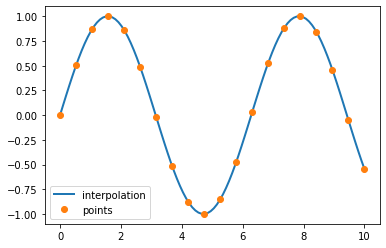

In [34]:
## PLOT THE RESULTS ##


polyplot(xm, ym, xplot, yplot)


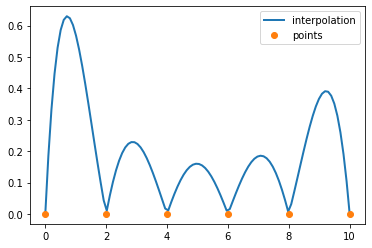

In [31]:
## PLOT THE ERROR ##
import matplotlib.pyplot as plt
xplot = np.linspace(0,10,100)
y1 = np.sin(xplot)


polyplot(xm, zeros, xplot, abs(yplot-y1))


The error is smaller where there is nodes, it's logic.